In [295]:
%autosave 30

Autosaving every 30 seconds


# Object-Oriented Programming (OOP)

## Exercises

### Create a Vehicle class with max_speed and mileage instance attributes

In [8]:
class Vehicle:
    def __init__(self, max_speed, mileage):
        self.max_speed=max_speed
        self.mileage=mileage
        
bmw=Vehicle(2650, 4)
print(bmw.max_speed,',', bmw.mileage)

2650 , 4


### Create a Vehicle class without any variables and methods


In [9]:
class Vehicle:
    pass        

### Create a child class Bus that will inherit all of the variables and methods of the Vehicle class

In [14]:
class Vehicle:
    def __init__(self, name, max_speed, mileage):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage

class Bus(Vehicle):
    pass

In [15]:
lkw=Bus('Big LKW', 45, 34)
print(lkw.name, lkw.max_speed, lkw.mileage)

Big LKW 45 34


### Create a Bus class that inherits from the Vehicle class. Give the capacity argument of Bus.seating_capacity() a default value of 50.

In [16]:
class Vehicle:
    def __init__(self, name, max_speed, mileage):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage

    def seating_capacity(self, capacity):
        return f"The seating capacity of a {self.name} is {capacity} passengers"

class Bus(Vehicle):
    def seating_capacity(self, capacity=50):
        return super().seating_capacity(capacity=50)

In [18]:
lkw=Bus("Big LKW", 100, 45)
lkw.seating_capacity()

'The seating capacity of a Big LKW is 50 passengers'

### Define property that should have the same value for every class instance
* Define a class attribute”color” with a default value white. I.e., Every Vehicle should be white

In [19]:
class Vehicle:

    def __init__(self, name, max_speed, mileage, color='white'):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage
        self.color=color

class Bus(Vehicle):
    pass

class Car(Vehicle):
    pass

In [22]:
## Bus
lkw=Bus("small lkw", 100, 56)
print(lkw.color)

white


In [23]:
## Car
clio=Car("Clio", 160, 45)
print(clio.color)

white


### Class Inheritence
* Create a Bus child class that inherits from the Vehicle class. The default fare charge of any vehicle is seating capacity * 100. If Vehicle is Bus instance, we need to add an extra 10% on full fare as a maintenance charge. So total fare for bus instance will become the final amount = total fare + 10% of the total fare.
* Note: The bus seating capacity is 50. so the final fare amount should be 5500. You need to override the fare() method of a Vehicle class in Bus class.


In [32]:
class Vehicle:
    def __init__(self, name, mileage, capacity):
        self.name = name
        self.mileage = mileage
        self.capacity = capacity

    def fare(self):
        return self.capacity * 100

class Bus(Vehicle):
    def fare(self):
        return super().fare() + (10/100*super().fare())

School_bus = Bus("School Volvo", 12, 50)
print("Total Bus fare is:", School_bus.fare())

Total Bus fare is: 5500.0


### Determine which class a given Bus object belongs to (Check type of an object)

In [34]:
class Vehicle:
    def __init__(self, name, mileage, capacity):
        self.name = name
        self.mileage = mileage
        self.capacity = capacity

class Bus(Vehicle):
    pass

School_bus = Bus("School Volvo", 12, 50)

In [35]:
type(School_bus)

__main__.Bus

### Determine if School_bus is also an instance of the Vehicle class


In [37]:
class Vehicle:
    def __init__(self, name, mileage, capacity):
        self.name = name
        self.mileage = mileage
        self.capacity = capacity

class Bus(Vehicle):
    pass

School_bus = Bus("School Volvo", 12, 50)

In [40]:
isinstance(School_bus, Vehicle)

True

# Random Data Generation

## Tutorial

### Random number Generator
<div>
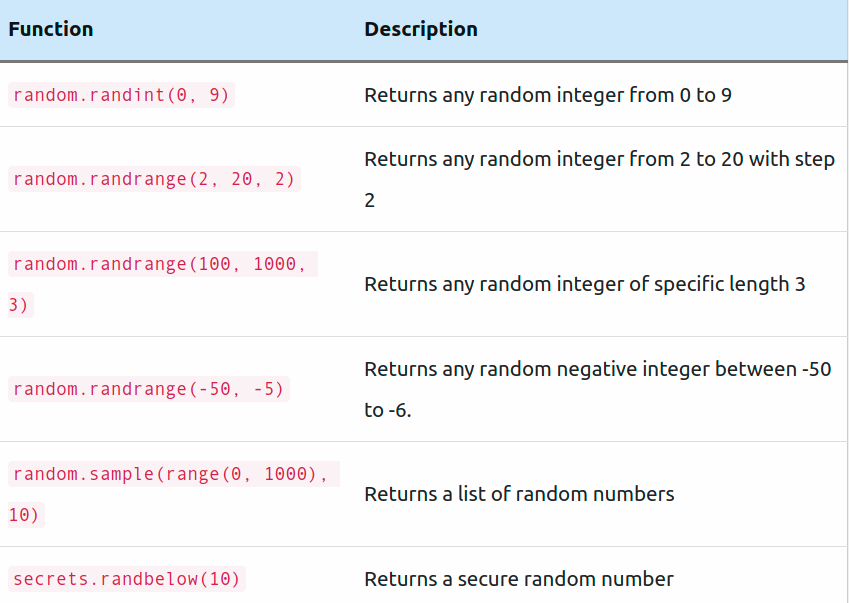
</div>

### Secret module function

<div>
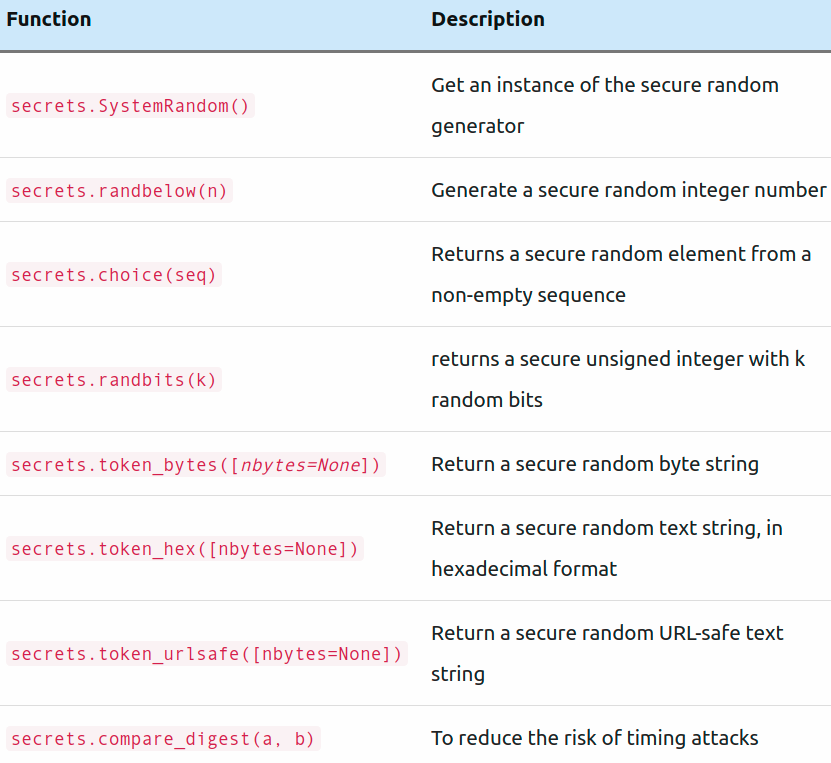
</div>


## Exercises

### Generate 3 random integers between 100 and 999 which is divisible by 5

In [45]:
import random
random.randint(100, 999)

370

In [69]:
### Approach I
aList=[]
for i in range(100):
    randNum=random.randint(100, 999)
    if randNum%5==0:
        aList.append(randNum)
    if len(aList) ==3:
        break
    
print(aList)

[390, 535, 600]


In [88]:
### Approach II
[random.randrange(100, 999,5) for i in range(3)]

[260, 320, 650]

### Random Lottery Pick. Generate 100 random lottery tickets and pick two lucky tickets from it as a winner.
* Note you must adhere to the following conditions:
    - The lottery number must be 10 digits long.
    - All 100 ticket number must be unique.


In [99]:
import random
lottery_ticket_list=[]

for i in range(100):
    lotnum=random.randrange(999999999, 10000000000)
    lottery_ticket_list.append(lotnum)
print(lotteryNum)

winners = random.sample(lottery_ticket_list, 2)
print('winner=====>',winners)

[9650465396, 8904387681, 9995562554, 8657110749, 3932890345, 5645054400, 7452472002, 9573344505, 8998111284, 2536585422, 2437819719, 5793696260, 8056684018, 5551182813, 4626584419, 2190942390, 2734937309, 8642019676, 5723477805, 9727674049, 9116506583, 8592675835, 8201683021, 5820675404, 4527103325, 6329746160, 5309207463, 6458023865, 6537582307, 5226321146, 7750120533, 4447690347, 5776678298, 4349918832, 2932803470, 7815389633, 1483412575, 8789079307, 2704424473, 6942859018, 6522225567, 8767570839, 6608200936, 1913458066, 6740847129, 1694478528, 7690643608, 3493000185, 4055602708, 4142250179, 7939739689, 7897287452, 3084006837, 1020107875, 1180035203, 8878021990, 4214278636, 9561321810, 8102829523, 9869225514, 6263634950, 8529311355, 6932977342, 4132730459, 1520656657, 3176148986, 9597857762, 1150288688, 5361107271, 5371013282, 8114649225, 9406359435, 7905246514, 3842764483, 2920541128, 4766769052, 4911647867, 4003033406, 3973158478, 9608662262, 2638365737, 8599558267, 8579787674, 975

### Generate 6 digit random secure OTP

In [103]:
import secrets
secretGenerator=secrets.SystemRandom()
OTP=secretGenerator.randrange(100000,999999)
print('secure otp:', OTP)

secure otp: 505436


### Pick a random character from a given String

In [108]:
import random
aString='There is the waterfall!'
random.choice(aString)

'w'

### Generate  random String of length 5


In [128]:
import random
import string

def get_random_string(length):
    letters= string.ascii_letters
    result_str=''.join(random.choice(letters) for i in range(length))
    print(f'random string of length {length} is {result_str}')

In [129]:
get_random_string(4)

random string of length 4 is NRaQ


### Generate a random Password which meets the following conditions
* Password length must be 10 characters long.
* It must contain at least 2 upper case letters, 1 digit, and 1 special symbol.

In [201]:
### Approach I
import random
import string

def random_password():
    a=''.join(random.choice(string.punctuation) for i in range(1) )
    b=''.join(random.choice(string.ascii_uppercase) for i in range(2))
    c=''.join(random.choice(string.digits) for i in range(2))
    d=a.join(b)
    return d.join(c)

In [200]:
random_password()

'1D@H9'

In [202]:
### Approach II
import random
import string

def randomPassword():
    randomSource = string.ascii_letters + string.digits + string.punctuation
    password = random.sample(randomSource, 6)
    password += random.sample(string.ascii_uppercase, 2)
    password += random.choice(string.digits)
    password += random.choice(string.punctuation)

    passwordList = list(password)
    random.SystemRandom().shuffle(passwordList)
    password = ''.join(passwordList)
    return password

print ("Password is ", randomPassword())

Password is  *'40iHZ&P(


### Calculate multiplication of two random float numbers
* Note:
    - First random float number must be between 0.1 and 1
    - Second random float number must be between 9.5 and 99.5


In [221]:
import random 
firstNum=random.random()
secNum = random.uniform(9.5, 99.5)
print(f"multplication of {firstNum} and {secNum} is {firstNum*secNum}")


multplication of 0.09208239352371117 and 93.53370824839378 is 8.612807730660585


###  Generate random secure token of 64 bytes and random URL

In [222]:
import secrets
import random
            
print(f'random secrure url of 64 bite is {secrets.token_urlsafe(64)}')
print(f'random secure token of 64 bite is {secrets.token_hex(64)}')


random secrure url of 64 bite is jSyrZCIgGuUsWjkM2jh_Z5XnFlCrAsvxLPZjULwLbypvjnAG4534er1j-hhYoSvO5KNy1c2pwEWGhAkbOy468A
random secure token of 64 bite is c43611b9cf73947d0cbff519dc5afb292aff1867389126d1dc812b0bed2abcdfb109f041d3cba98ab8a358ba8142ceda074c94cd7eafd2808a0be0110174f021


### Roll dice in such a way that every time you get the same number
* Dice has 6 numbers (from 1 to 6). Roll dice in such a way that every time you must get the same output number. do this 5 times.

In [244]:
import random
def roll_dice(output):
    rolled_output=[]
    for i in range(50):
        randNum=random.randint(1,6)
        if randNum==output:
            rolled_output.append(randNum)
        if len(rolled_output)==5:
            break
    print(rolled_output)

In [246]:
roll_dice(4)

[4, 4, 4, 4, 4]


In [253]:
### Approach II
import random

dice = [1, 2, 3, 4, 5, 6]
print("Randomly selecting same number of a dice")
for i in range(5):
    random.seed(28)
    print(random.choice(dice))

Randomly selecting same number of a dice
1
1
1
1
1


### Generate a random date between given start and end dates

In [260]:
### Approach I
import random
import datetime

start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2020, 2, 1)

time_between_dates = end_date - start_date
days_between_dates = time_between_dates.days

random_number_of_days = random.randrange(days_between_dates)
random_date = start_date + datetime.timedelta(days=random_number_of_days)

print(random_date)

2020-01-23


In [261]:
### Approach II
import random
import time

def getRandomDate(startDate, endDate ):
    print("Printing random date between", startDate, " and ", endDate)
    randomGenerator = random.random()
    dateFormat = '%m/%d/%Y'

    startTime = time.mktime(time.strptime(startDate, dateFormat))
    endTime = time.mktime(time.strptime(endDate, dateFormat))

    randomTime = startTime + randomGenerator * (endTime - startTime)
    randomDate = time.strftime(dateFormat, time.localtime(randomTime))
    return randomDate

print ("Random Date = ", getRandomDate("1/1/2016", "12/12/2018"))


Printing random date between 1/1/2016  and  12/12/2018
Random Date =  07/10/2016


# Decorators
* allow you to make simple modifications to callable objects like functions, methods, or classes. We shall deal with functions for this tutorial.  
* The syntax:
```
@decorator
def functions(arg):
    return "value"
```
is equivalent to:
```
def function(arg):
    return "value"
function = decorator(function) # this passes the function to the decorator, and reassigns it to the functions
 
```

* Refernz:
    - [ref](https://realpython.com/primer-on-python-decorators/)
    - [ref_2](https://jobtensor.com/Tutorial/Python/en/Decorators)

## Tutorial

### Basic function

In [267]:
def my_decorator(func):
    def wrapper():
        print("something is happening before the function is called")
        func()
        print("something is happening after the function is called.")
    return wrapper

In [270]:
## Approach I
def say_whee():
    print('Whee!!!')

say_whee = my_decorator(say_whee)
say_whee()

something is happening before the function is called
Whee!!!
something is happening after the function is called.


In [271]:
### Approach II
@my_decorator
def say_whee():
    print("Whee!!!")
    
say_whee()

something is happening before the function is called
Whee!!!
something is happening after the function is called.


###  Decorator wrap a function, modifying its behavior

In [272]:
from datetime import datetime

def not_during_the_night(func):
    def wrapper():
        print("hr : ", datetime.now().hour)
        if 8 < datetime.now().hour < 22:
            func()
        else:
            pass            
    return wrapper

@not_during_the_night
def say_whee():
    print('whee is the common function to be called to make us awake!!')

In [274]:
test=say_whee()

hr :  13
whee is the common function to be called to make us awake!!


### Decorating functions with arguments 

In [298]:
def do_once(func):
    def wrapper_return_func(*args, **kwargs):
        func(*args, **kwargs)
        return func(*args,  **kwargs)
    return wrapper_return_func

@do_once
def greet(name):
    print("creating greetings for ", name)
    #return name
@do_once
def add(a,b):
    return a + b

In [299]:
greet("ole stegen")

creating greetings for  ole stegen
creating greetings for  ole stegen


In [300]:
add(4,5)

9

In [282]:
greet

<function __main__.do_once.<locals>.wrapper_return_func(*args, **kwargs)>

In [283]:
greet.__name__

'wrapper_return_func'

In [285]:
help(greet)

Help on function wrapper_return_func in module __main__:

wrapper_return_func(*args, **kwargs)



### Functool wrapper

However, after being decorated, greet() has gotten very confused about its identity. It now reports being the wrapper_do_twice() inner function inside the do_twice() decorator. Although technically true, this is not very useful information.

To fix this, decorators should use the @functools.wraps decorator, which will preserve information about the original function. Update decorators.py again:


In [288]:
import functools

def do_once(func):
    @functools.wraps(func)
    def wrapper_return_func(*args, **kwargs):
        func(*args, **kwargs)
        return func(*args,  **kwargs)
    return wrapper_return_func

@do_once
def greet(name):
    print("creating greetings for ", name)
    return name

In [289]:
greet("Ole")

creating greetings for  Ole
creating greetings for  Ole


'Ole'

In [290]:
greet

<function __main__.greet(name)>

In [291]:
greet.__name__

'greet'

In [292]:
help(greet)

Help on function greet in module __main__:

greet(name)



In [293]:
dir(greet)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']